---------------------------------------
Affichage données initiales            


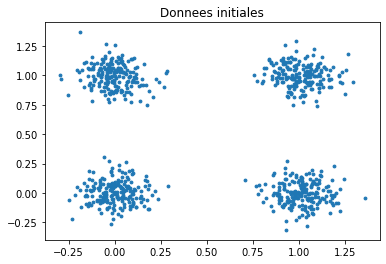

---------------------------------------
Affichage données initiales  3D line plot  


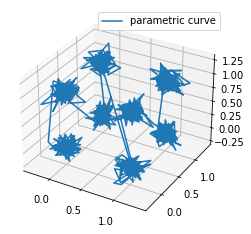

---------------------------------------
Affichage données initiales  3D scatter plot  


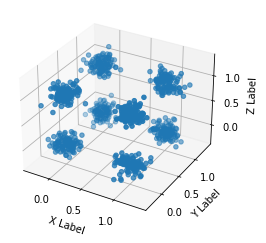

---------------------------------------
Affichage données initiales  3D tri-surface plot  


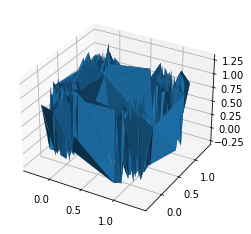

------------------------------------------------------
Appel KMeans pour une valeur de k fixée (données init)


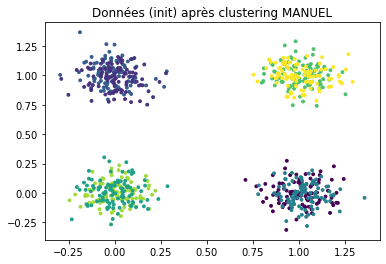

nb clusters = 8 , nb iter = 2 , runtime =  40.01 ms
Inertie :  22.91845221596443
Coefficient de silhouette :  0.7604059237753367
------------------------------------------------------
Appel KMeans pour une valeur de k fixée (données init)


C:\Users\teo_l\anaconda3\lib\site-packages\sklearn\metrics\cluster\_supervised.py:58: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and binary values for target
  warnings.warn(msg, UserWarning)
C:\Users\teo_l\anaconda3\lib\site-packages\sklearn\metrics\cluster\_supervised.py:58: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and binary values for target
  warnings.warn(msg, UserWarning)
C:\Users\teo_l\anaconda3\lib\site-packages\sklearn\metrics\cluster\_supervised.py:58: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
C:\Users\teo_l\anaconda3\lib\site-packages\sklearn\metrics\cluster\_supervised.py:58: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
C:\U

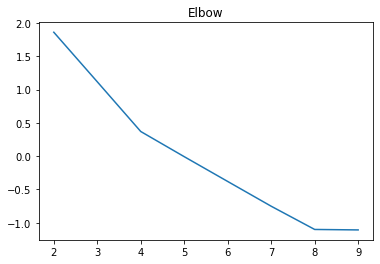

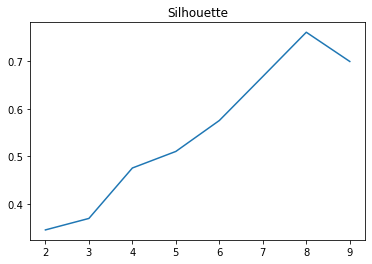

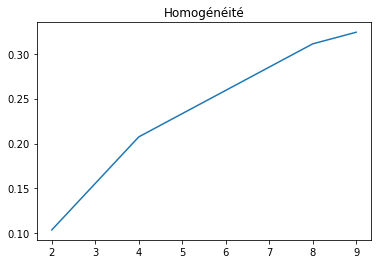

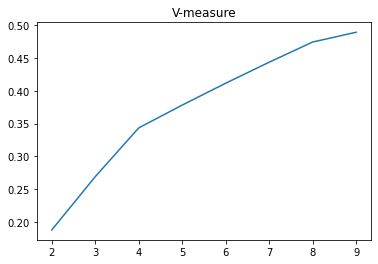

best k is =  6
Best inert 3
Best silh 8
Best v_meas 9
Best homs 2
------------------------------------------------------


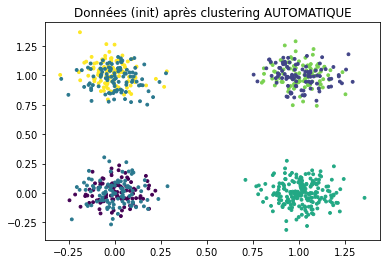

nb clusters = 6 , nb iter = 4 , runtime =  663.81 ms
---------------------------------------
Affichage des données en 3D avec k déterminé AUTOMATIQUEMENT


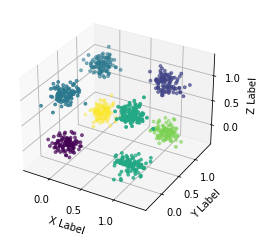

---------------------------------------
Affichage des données en 3D avec k déterminé MANUELLEMENT


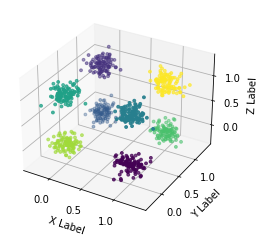

In [59]:
# -*- coding: utf-8 -*-
"""
Created on Fri Nov 19 23:08:23 2021

@author: huguet
"""
import numpy as np
import matplotlib.pyplot as plt


import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

import time

from scipy.io import arff
from sklearn import cluster
from sklearn import metrics



from sklearn import preprocessing


##################################################################
# READ a data set (arff format)

# Parser un fichier de données au format arff
# datanp est un tableau (numpy) d'exemples avec pour chacun la liste 
# des valeurs des features

# Note 1 : 
# dans les jeux de données considérés : 2 features (dimension 2 seulement)
# t =np.array([[1,2], [3,4], [5,6], [7,8]]) 
#
# Note 2 : 
# le jeu de données contient aussi un numéro de cluster pour chaque point
# --> IGNORER CETTE INFORMATION ....
#    2d-4c-no9.arff

path = './artificial/'

#JEUX DE DONNEES TESTE:

#golfball.arff  hypercube.arff   atom.arff  hepta.arff

#bien marché tetra
#Mavais atom

databrut = arff.loadarff(open(path+"hypercube.arff", 'r'))
datanp = np.array([[x[0],x[1],x[2]] for x in databrut[0]])
ground_truth = np.array([[x[0],x[1],x[2]] for x in databrut[0]])[:,2]


#print(databrut)
#print(datanp)

##################################################################
# PLOT datanp (en 2D) - / scatter plot
# Extraire chaque valeur de features pour en faire une liste
# EX : 
# - pour t1=t[:,0] --> [1, 3, 5, 7]
# - pour t2=t[:,1] --> [2, 4, 6, 8]
print("---------------------------------------")
print("Affichage données initiales            ")
f0 = datanp[:,0] # tous les élements de la première colonne
f1 = datanp[:,1] # tous les éléments de la deuxième colonne
f2 = datanp[:,2] # tous les éléments de la troisième colonne

plt.scatter(f0, f1, s=8)
plt.title("Donnees initiales")
plt.show()



########################################################################
# AUTRES VISUALISATION DU JEU DE DONNEES
# (histogrammes par exemple,)
# But : essayer d'autres types de plot 
########################################################################

print("---------------------------------------")
print("Affichage données initiales  3D line plot  ")


mpl.rcParams['legend.fontsize'] = 10

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
#theta = np.linspace(-4 * np.pi, 4 * np.pi, 100)
#z = np.linspace(-2, 2, 100)
#r = z**2 + 1
#x = r * np.sin(theta)
#y = r * np.cos(theta)
ax.plot(f0, f1, f2, label='parametric curve')
ax.legend()

plt.show()

print("---------------------------------------")
print("Affichage données initiales  3D scatter plot  ")

fig2 = plt.figure()
ax = fig2.add_subplot(projection='3d')

ax.scatter(f0, f1, f2, label='parametric curve')

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')


plt.show()


print("---------------------------------------")
print("Affichage données initiales  3D tri-surface plot  ")

fig3 = plt.figure()
ax = fig3.add_subplot(projection='3d')


ax.plot_trisurf(f0, f1, f2, linewidth=0.2, antialiased=True)


# Plot the surface.
#surf = ax.plot_surface(f0, f1, f2, cmap=cm.coolwarm,
#                       linewidth=0, antialiased=False)

# Customize the z axis.
#ax.set_zlim(-1.01, 1.01)
#ax.zaxis.set_major_locator(LinearLocator(10))
#ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

# Add a color bar which maps values to colors.
#fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()




########################################################################
# STANDARDISER ET VISUALISER 
# But : comparer des méthodes de standardisation, ...
########################################################################




##################################################################
# Run clustering method for a given number of clusters  TESTER AVEC DIFFERENTES TYPES DE DONNES POUR VOIR 
#LIMITE, AUCUNE METHODE UNIVERSELLE, CERTAINES MEILLEURES AVEC CERTAINS TYPES DE DONNES ET NULLES AVEC D'AUTRES
#

print("------------------------------------------------------")
print("Appel KMeans pour une valeur de k fixée (données init)")
tps1 = time.time()
k=8
model_km = cluster.KMeans(n_clusters=k, init='k-means++')
model_km.fit(datanp)
tps2 = time.time()
labels_km = model_km.labels_
# Nb iteration of this method
iteration = model_km.n_iter_

# Résultat du clustering
plt.scatter(f0, f1, c=labels_km, s=8)
plt.title("Données (init) après clustering MANUEL")
plt.show()
print("nb clusters =",k,", nb iter =",iteration, ", runtime = ", round((tps2 - tps1)*1000,2),"ms")
#print("labels", labels_km)
# Some evaluation metrics
# inertie = wcss : within cluster sum of squares
inert = model_km.inertia_
silh = metrics.silhouette_score(datanp, model_km.labels_, metric='euclidean')
print("Inertie : ", inert)
print("Coefficient de silhouette : ", silh)




















########################################################################
# TESTER PARAMETRES METHODE ET RECUPERER autres métriques > METHODE AUTOMATIQUE
########################################################################

print("------------------------------------------------------")
print("Appel KMeans pour une valeur de k fixée (données init)")

def find_max(liste):
    max_index, max_value = max(enumerate(liste), key=lambda x: x[1])
    return max_index

def find_min(liste):
    min_index, min_value = min(enumerate(liste), key=lambda x: x[1])
    return min_index

def plot_metrics(Y, title):
    plt.plot(range(2,10), Y)
    plt.title(title)
    plt.show()

def compute_distance(X, Y):
    return np.sqrt(np.sum(np.square(X[0]-X[1]) + np.square(Y[0]-Y[1])))

def find_best_index(liste, cmp):
    distances = []
    best_index = 0
    for i in range(len(liste)):
        distance = compute_distance([0.0, cmp], [i, liste[i]])
        distances.append(distance)

    best_index = find_min(distances)
    return best_index

def get_best_k():
    inerts = []
    silhs = []
    homs = []
    v_meas = []
    model_kms = []
    for k in range(2,10):
        model_km = cluster.KMeans(n_clusters=k, init='k-means++')
        model_km.fit(datanp)
        labels_km = model_km.labels_
        inerts.append(model_km.inertia_)
        silhs.append(metrics.silhouette_score(datanp, model_km.labels_, metric='euclidean'))
        homs.append(metrics.homogeneity_score(ground_truth, labels_km))
        v_meas.append(metrics.v_measure_score(ground_truth, labels_km))
        model_kms.append(model_km)

    best_silh = find_max(silhs)
    best_v_meas = find_max(v_meas)
    inerts = preprocessing.scale(inerts)
    best_inert = find_best_index(inerts, 0.0)
    best_homs = find_best_index(homs, 1.0)
    
    # On détermine la moyenne des métriques
    mean_k = (best_inert + best_silh + best_v_meas + best_homs) / 4
    
    # On applique l'offset de l'index
    best_k = round(mean_k) + 2
    plot_metrics(inerts, "Elbow")
    
    plot_metrics(silhs, "Silhouette")
    plot_metrics(homs, "Homogénéité")
    plot_metrics(v_meas, "V-measure") 
    

    print("best k is = ", best_k)
    print("Best inert", best_inert + 2)
    print("Best silh", best_silh + 2)
    print("Best v_meas", best_v_meas + 2)
    print("Best homs", best_homs + 2)
    print("------------------------------------------------------")

    return best_k, model_kms[best_k-2]

def run_k_means():
    tps1 = time.time()
    k, model_km = get_best_k()
    tps2 = time.time()
    # Nb iteration of this method
    iteration = model_km.n_iter_
    labels_km = model_km.labels_
    plt.scatter(f0, f1, c=labels_km, s=8)
    plt.title("Données (init) après clustering AUTOMATIQUE")
    plt.show()
    print("nb clusters =",k,", nb iter =",iteration, ", runtime = ", round((tps2 - tps1)*1000,2),"ms")
    
    print("---------------------------------------")
    print("Affichage des données en 3D avec k déterminé AUTOMATIQUEMENT")

    fig2 = plt.figure()
    ax = fig2.add_subplot(projection='3d')

    ax.scatter(f0, f1, f2, c=labels_km,s=8)

    ax.set_xlabel('X Label')
    ax.set_ylabel('Y Label')
    ax.set_zlabel('Z Label')

    plt.show()




run_k_means()
########################################################################
# COMPARAISON AVEC METHODE K-MEANS MANUELLE
########################################################################


print("---------------------------------------")
print("Affichage des données en 3D avec k déterminé MANUELLEMENT")

fig2 = plt.figure()
ax = fig2.add_subplot(projection='3d')

ax.scatter(f0, f1, f2, c=labels_km,s=8)

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')


plt.show()



